<a href="https://colab.research.google.com/github/alixa2003/Arch-Internship-Tasks/blob/main/Arch_Internship_Task01(Month_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HOUSE PRICE PREDICTION**

**Importing Libraries**

In [ ]:
#Data Handling
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

**Load dataset**

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Explore Dataset**

In [ ]:
print('Information of Dataset:\n')
df.info()

Information of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-nul

In [ ]:
print('Shape of Dataset:\n', df.shape)

Shape of Dataset:
 (4600, 18)


In [ ]:
print('Summary Stats:\n')
df.describe()

Summary Stats:



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Check for Missing & Duplicate Values**

In [ ]:
print('Null Values:\n', df.isnull().sum())

Null Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
print('Duplicate Values:\n', df.duplicated().sum())

Duplicate Values:
 0


**Unique Columns and Data Types**

In [ ]:
print('Columns:\n', df.columns)

Columns:
 Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [ ]:
print("Unique Country", df['country'].unique())
print("Unique Floors", df['floors'].unique())
print("Unique Bathrooms", df['bathrooms'].unique())
print("Unique Bedrooms", df['bedrooms'].unique())
print("Unique Waterfront", df['waterfront'].unique())
print("Unique View", df['view'].unique())
print("Unique Condition", df['condition'].unique())
print("Unique City", df['city'].unique())

Unique Country ['USA']
Unique Floors [1.5 2.  1.  2.5 3.  3.5]
Unique Bathrooms [1.5  2.5  2.   2.25 1.   1.75 2.75 3.   3.25 3.5  8.   4.25 4.   3.75
 5.   4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 0.   6.75]
Unique Bedrooms [3. 5. 4. 2. 6. 7. 9. 1. 8. 0.]
Unique Waterfront [0 1]
Unique View [0 4 1 2 3]
Unique Condition [3 5 4 2 1]
Unique City ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']


In [ ]:
print('Data Types:\n', df.dtypes)

Data Types:
 date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


**FEATURE ENGINEERING & CLEANUP**

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['sales_year'] = df['date'].dt.year
df['sales_month'] = df['date'].dt.month
df.drop('date', axis=1, inplace=True)
print("Date Column converted to year, month features.")

Date Column converted to year, month features.


In [ ]:
df.drop(columns=['street', 'statezip', 'country'], inplace=True)

In [ ]:
df['house_age'] = df['sales_year'] - df['yr_built']
df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1)
df['living_lot_ratio'] = df['sqft_lot'] / (df['sqft_living'] + 1)
df['has_basement'] = (df['sqft_basement'] > 0).astype(int)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_built,yr_renovated,city,sales_year,sales_month,house_age,was_renovated,bed_bath_ratio,living_lot_ratio,has_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,1955,2005,Shoreline,2014,5,59,1,1.200000,5.900075,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1921,0,Seattle,2014,5,93,0,1.428571,2.478773,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,1966,0,Kent,2014,5,48,0,1.000000,6.186950,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,1963,0,Bellevue,2014,5,51,0,0.923077,4.012994,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1976,1992,Redmond,2014,5,38,1,1.142857,5.409583,1


In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'sales_year', 'sales_month',
       'house_age', 'was_renovated', 'bed_bath_ratio', 'living_lot_ratio',
       'has_basement'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS (EDA)**

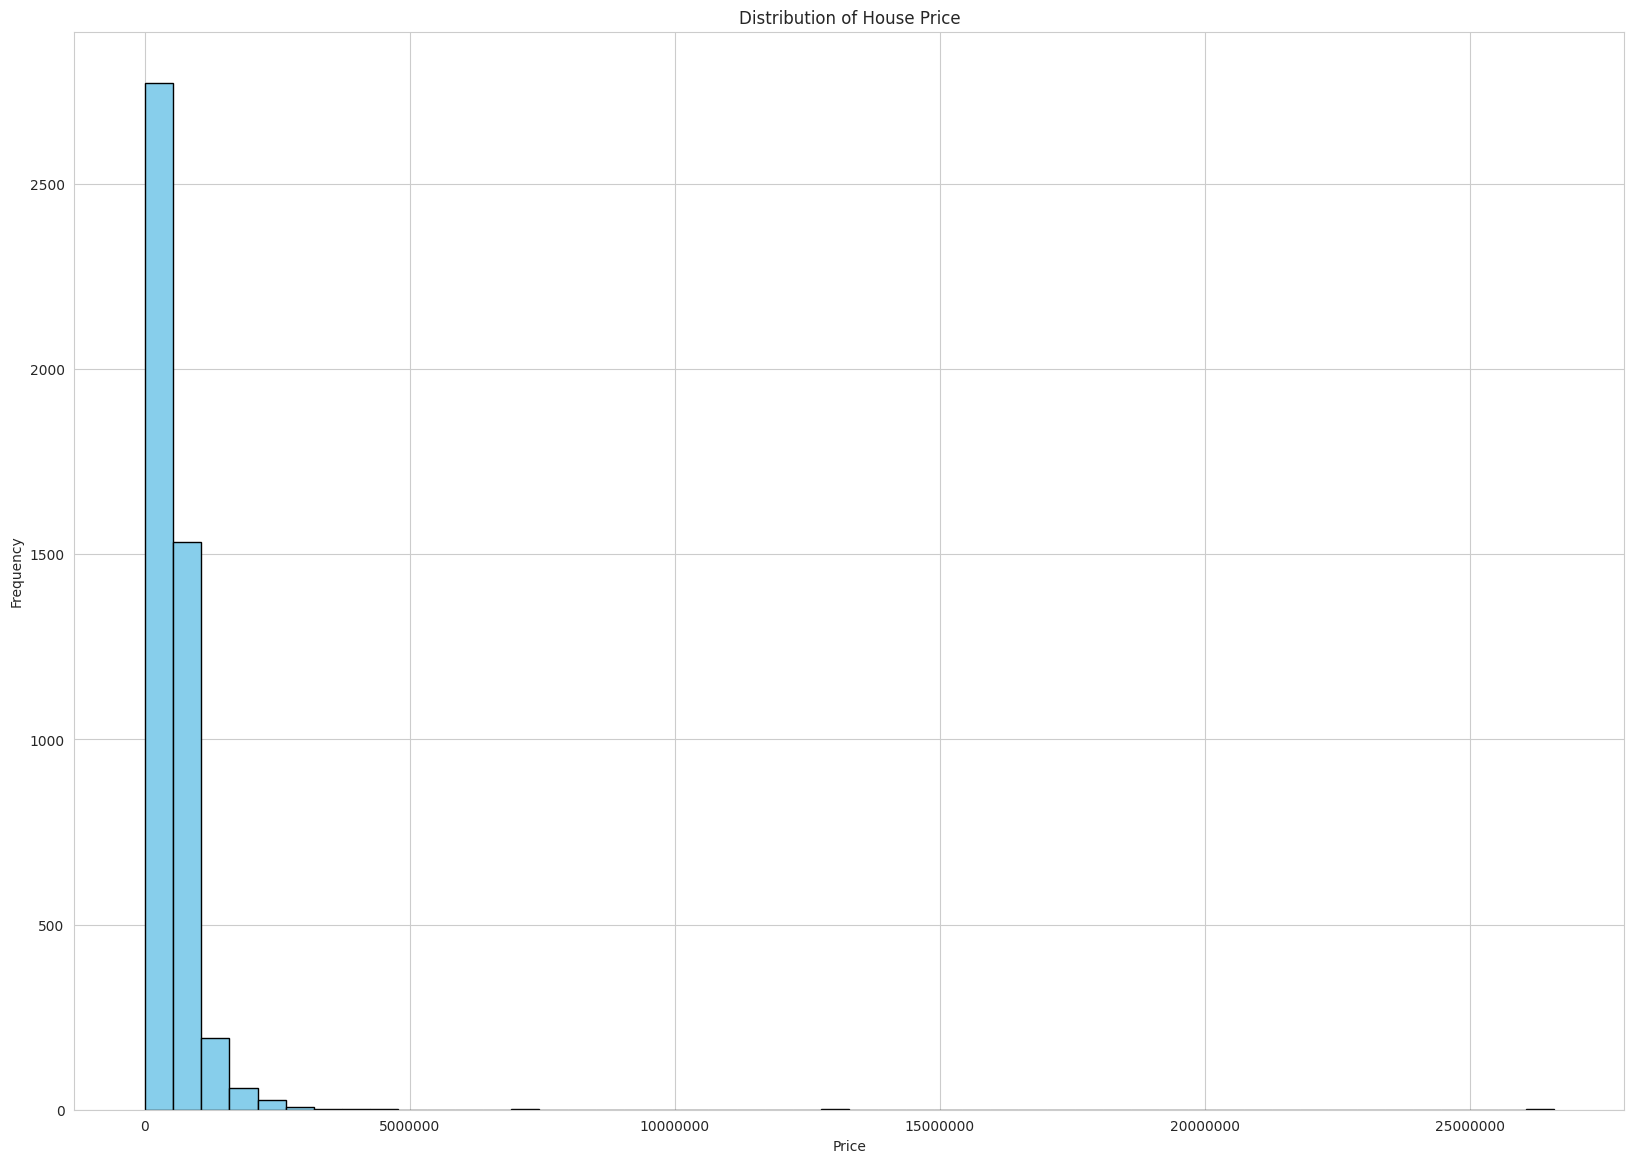

In [ ]:
#histogram of price
plt.figure(figsize=(20, 14))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Price')
plt.ticklabel_format(style='plain', axis = 'x')
plt.show()

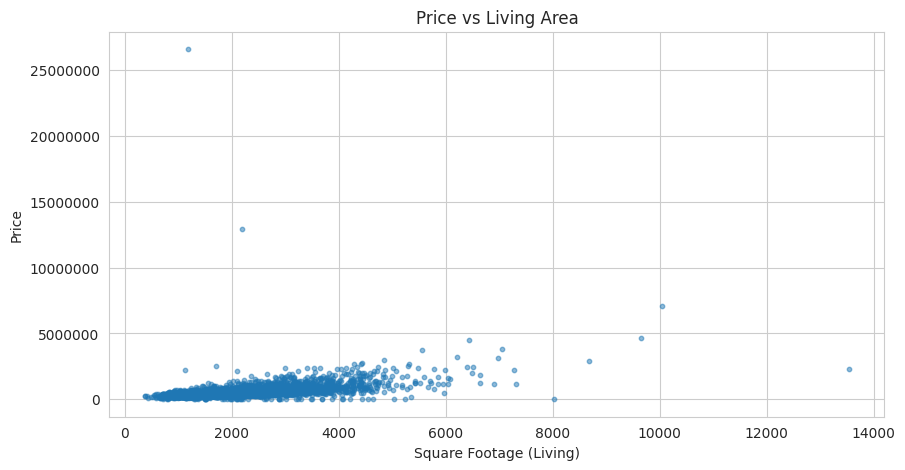

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, s=10)
plt.xlabel('Square Footage (Living)')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

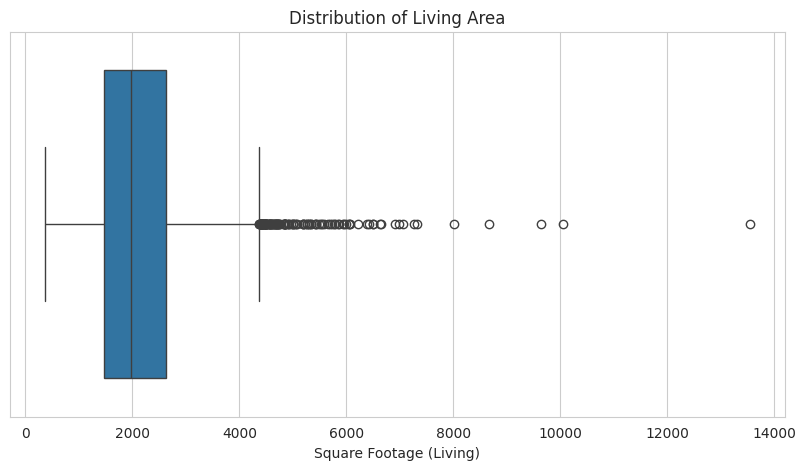

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sqft_living'])
plt.xlabel('Square Footage (Living)')
plt.title('Distribution of Living Area')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

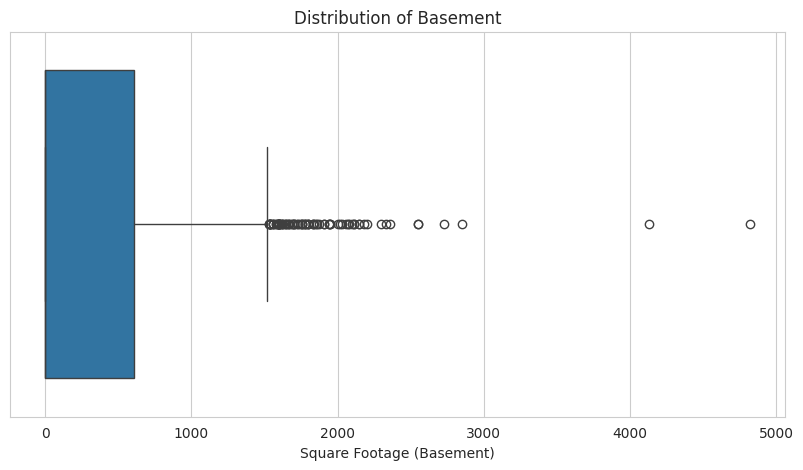

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sqft_basement'])
plt.xlabel('Square Footage (Basement)')
plt.title('Distribution of Basement')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

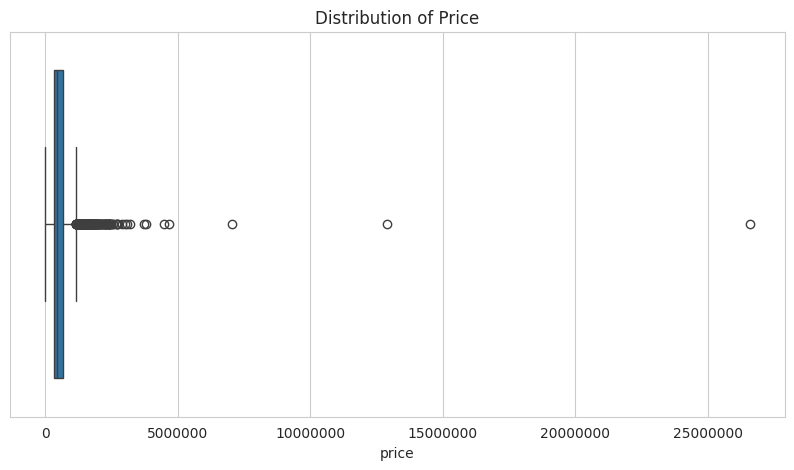

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.xlabel('price')
plt.title('Distribution of Price')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**Winsorization**

In [ ]:
for col in ['price', 'sqft_living', 'sqft_basement']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

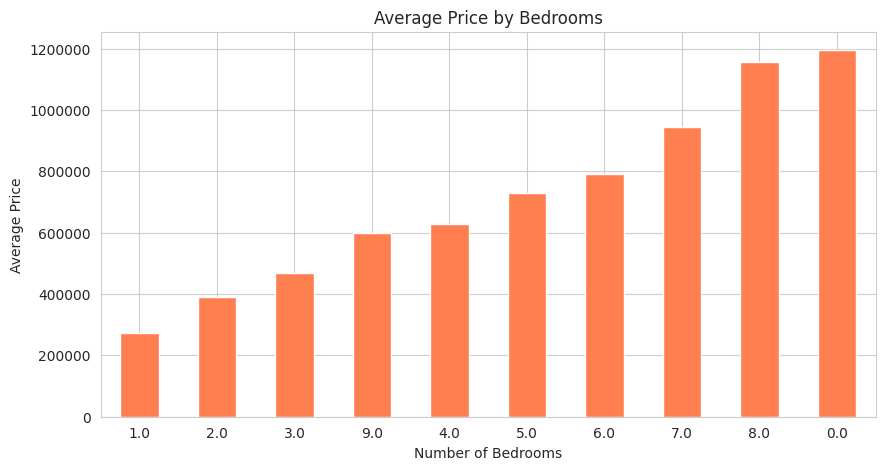

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('bedrooms')['price'].mean().sort_values().plot(kind='bar', color='coral')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Bedrooms')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

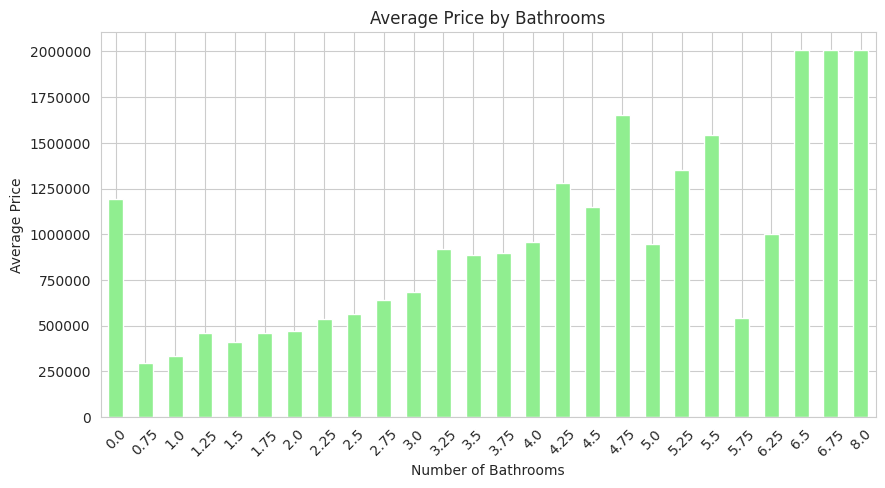

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('bathrooms')['price'].mean().plot(kind='bar', color='lightgreen')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Bathrooms')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

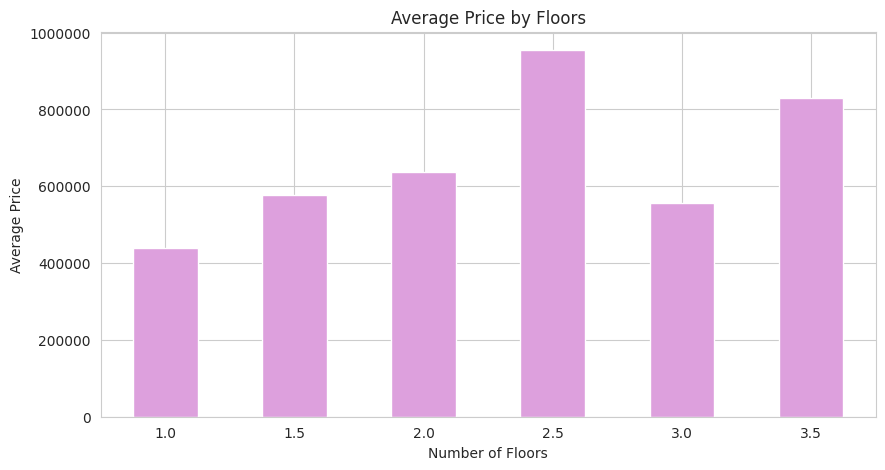

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('floors')['price'].mean().plot(kind='bar', color='plum')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.title('Average Price by Floors')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

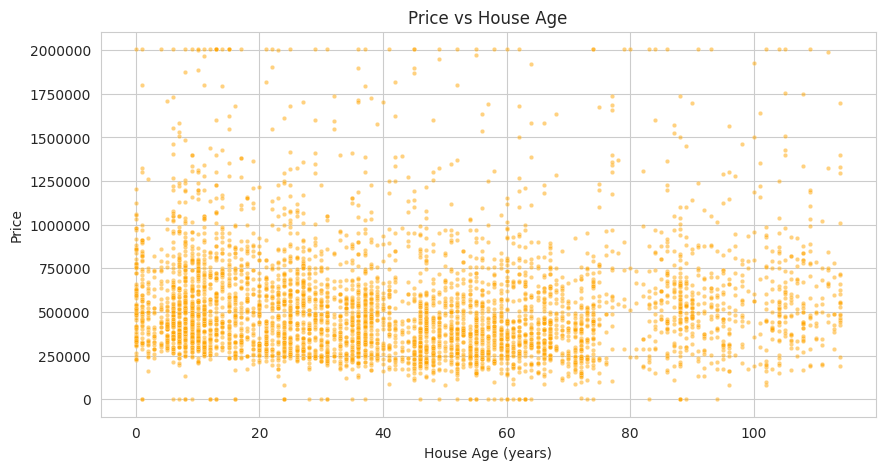

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['house_age'], y=df['price'], alpha=0.5, s=10, color='orange')
plt.xlabel('House Age (years)')
plt.ylabel('Price')
plt.title('Price vs House Age')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

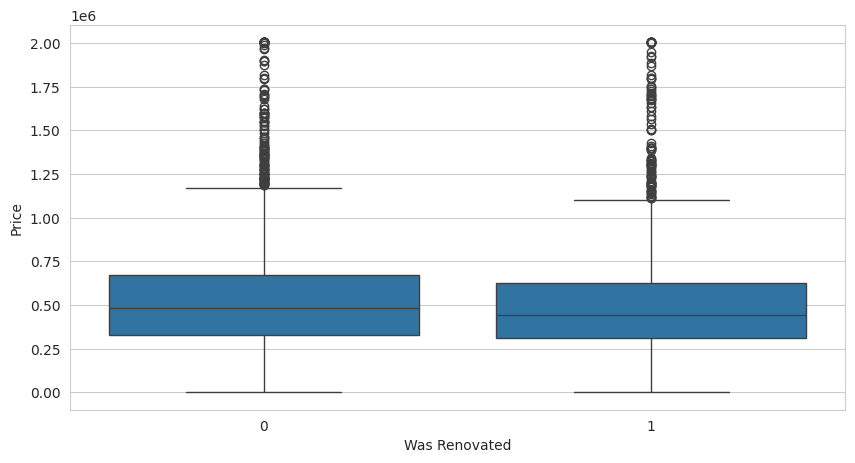

In [ ]:
#check relationship with was_renovated using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['was_renovated'], y=df['price'])
plt.xlabel('Was Renovated')
plt.ylabel('Price')
plt.show()

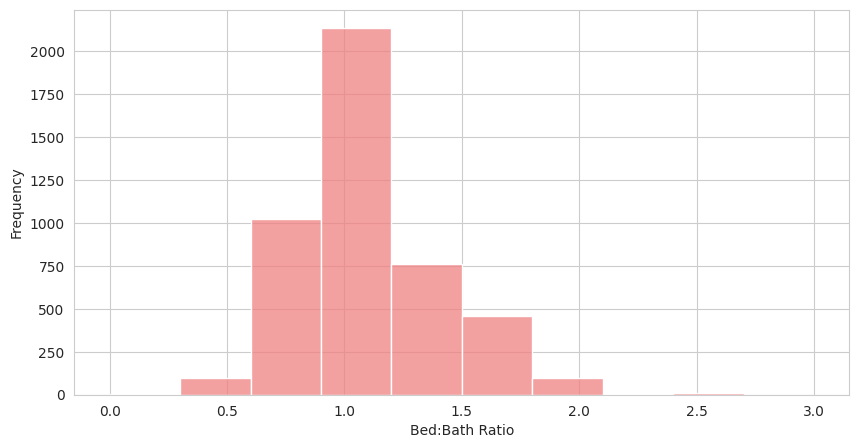

In [ ]:
#check distribution of bed_bath_ratio and living_lot_ratio
plt.figure(figsize=(10, 5))
sns.histplot(df['bed_bath_ratio'], bins=10, color='lightcoral')
plt.xlabel('Bed:Bath Ratio')
plt.ylabel('Frequency')
plt.show()

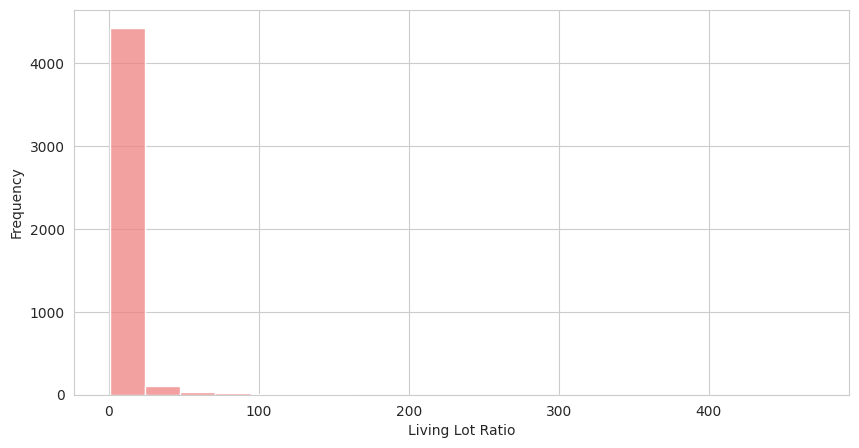

In [ ]:
#check distribution of bed_bath_ratio and living_lot_ratio
plt.figure(figsize=(10, 5))
sns.histplot(df['living_lot_ratio'], bins=20, color='lightcoral')
plt.xlabel('Living Lot Ratio')
plt.ylabel('Frequency')
plt.show()

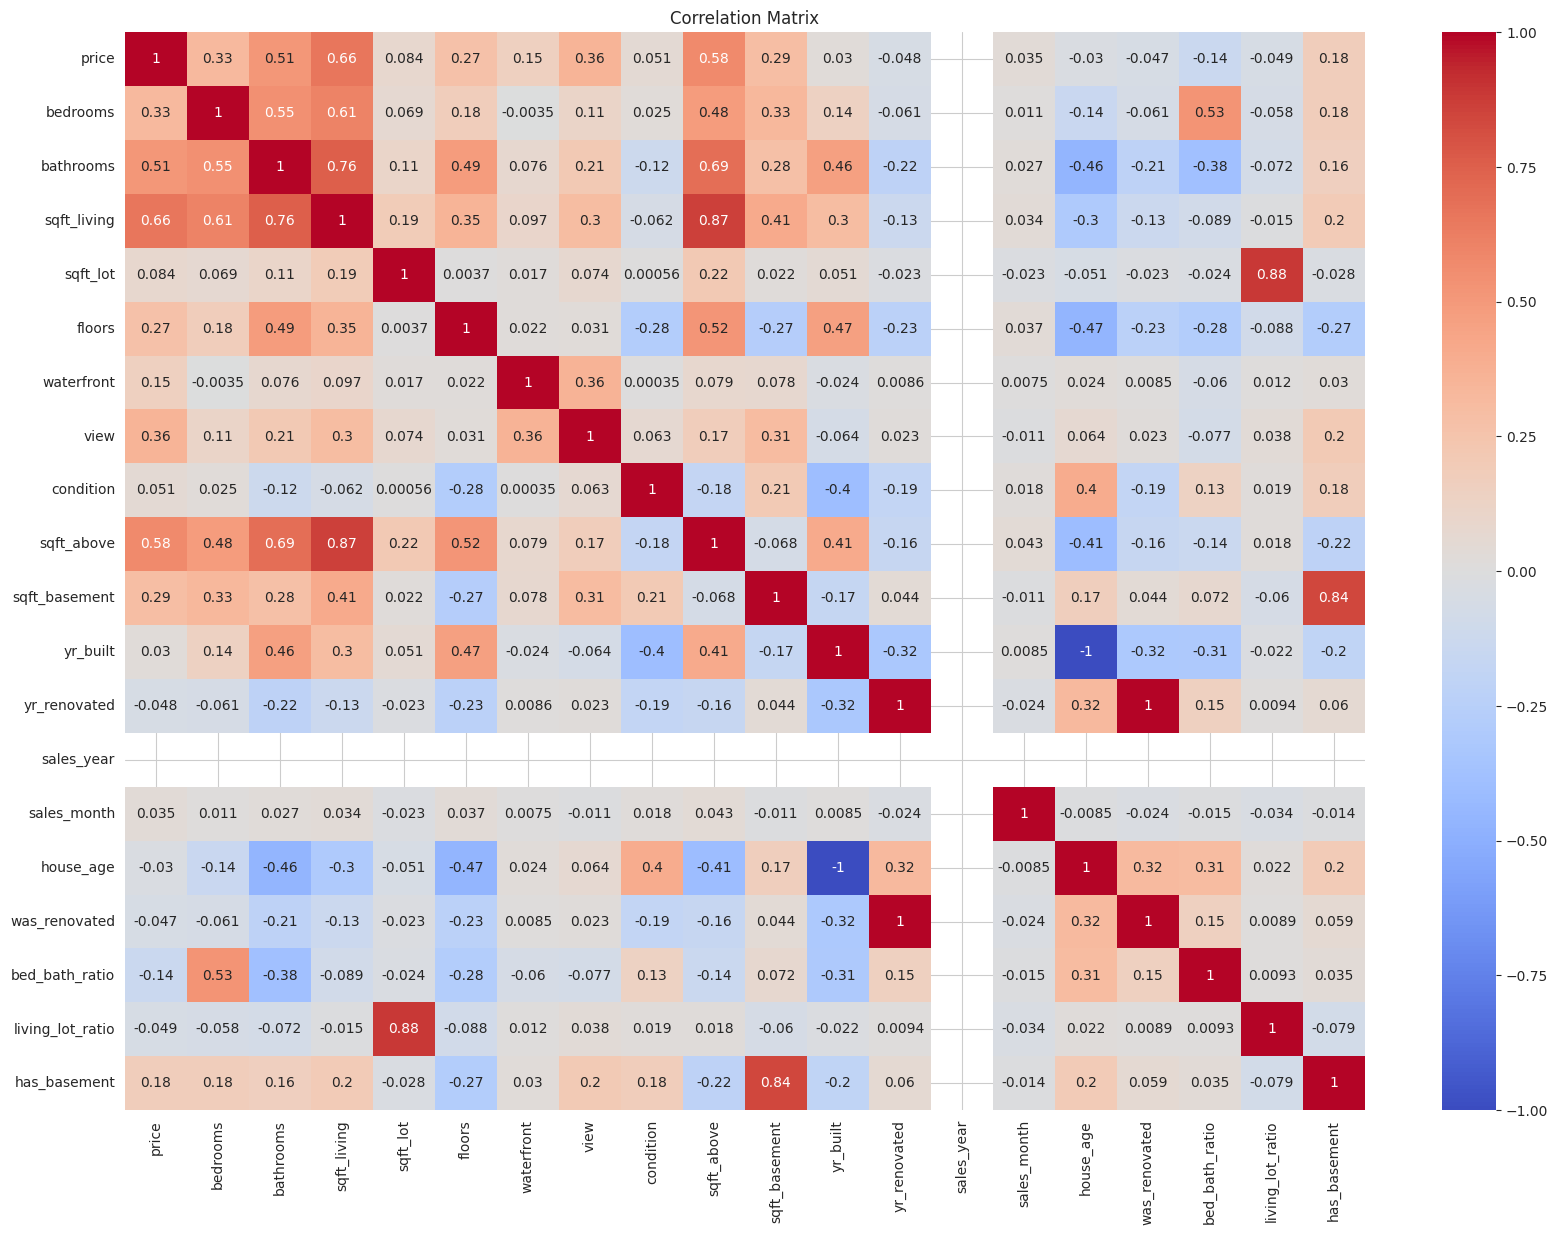

In [ ]:
plt.figure(figsize=(20, 14))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Compute correlation of all numerical features with price
correlation_with_price = correlation_matrix.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)


price               1.000000
sqft_living         0.866476
bathrooms           0.781926
sqft_above          0.760756
floors              0.537077
bedrooms            0.534361
view                0.500068
yr_built            0.382844
sqft_basement       0.284694
waterfront          0.159858
has_basement        0.110422
sqft_lot           -0.045487
sales_month        -0.075505
condition          -0.145434
living_lot_ratio   -0.284199
house_age          -0.382844
was_renovated      -0.416881
yr_renovated       -0.417278
bed_bath_ratio     -0.444182
sales_year               NaN
Name: price, dtype: float64


**DEFINE FEATURES & TARGET**

In [ ]:
y = df['price']

numerical_features = [
    'sqft_living', 'sqft_above', 'sqft_basement',
    'bedrooms', 'bathrooms', 'floors', 'view',
    'yr_built', 'has_basement', 'waterfront'
]

categorical_features = ['city']

X = df[numerical_features + categorical_features]

print(
    'Shape of X:', X.shape,
    '\nShape of y:', y.shape
)

Shape of X: (4600, 11) 
Shape of y: (4600,)


**Train/Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (3680, 11)
Shape of X_test: (920, 11)


**PREPROCESSING PIPELINE**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features) # Added handle_unknown='ignore'
    ]
)

**TRAIN MODELS**

In [ ]:
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
gbr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42
    ))
])

gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

**EVALUATE MODELS**

In [ ]:
def evaluate(y_true, y_pred, name):
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  print(f"{name} Metrics:")
  print(f"MAE: {mae:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"R2 Score: {r2:.2f}")
  return mae, rmse, r2

lr_test_mae, lr_test_rmse, lr_test_r2 = evaluate(y_test, y_pred_lr, "Linear Regression")
gb_test_mae, gb_test_rmse, gb_test_r2 = evaluate(y_test, y_pred_gbr, "Gradient Boosting")

Linear Regression Metrics:
MAE: 123456.30
RMSE: 216669.22
R2 Score: 0.56
Gradient Boosting Metrics:
MAE: 121168.53
RMSE: 217668.81
R2 Score: 0.56


**PREDICTION VISUALIZATION**

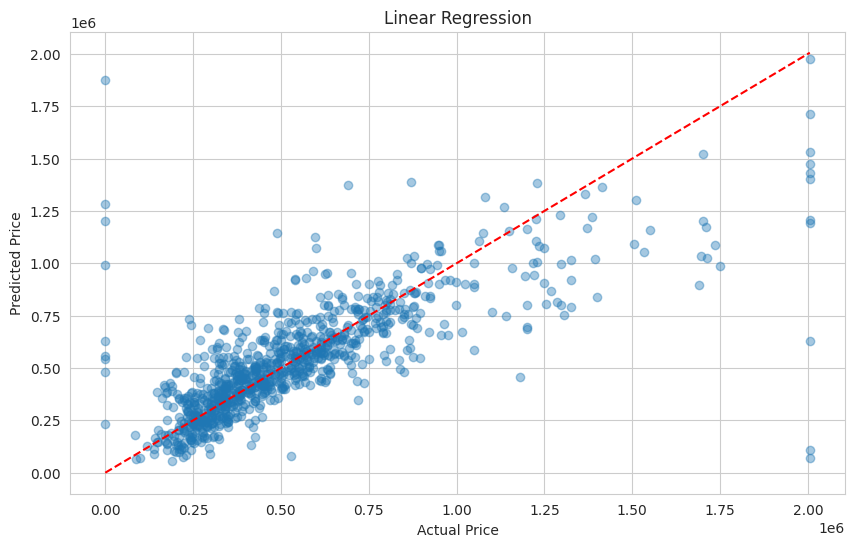

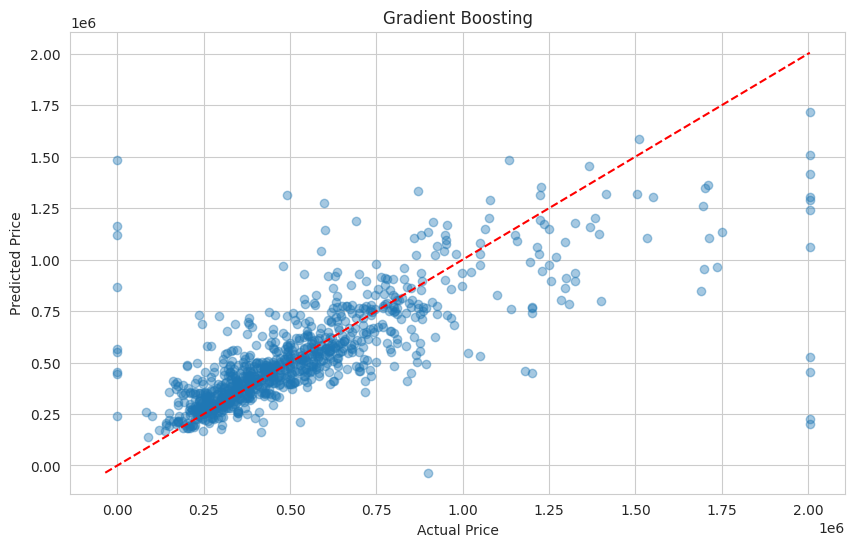

In [ ]:
def plot_pred(y_true, y_pred, title):
    plt.figure(figsize=(10,6))
    plt.scatter(y_true, y_pred, alpha=0.4)
    m = min(min(y_true), min(y_pred))
    M = max(max(y_true), max(y_pred))
    plt.plot([m, M], [m, M], '--', color='red')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    plt.show()

plot_pred(y_test, y_pred_lr, "Linear Regression")
plot_pred(y_test, y_pred_gbr, "Gradient Boosting")

**RESIDUAL ANALYSIS**

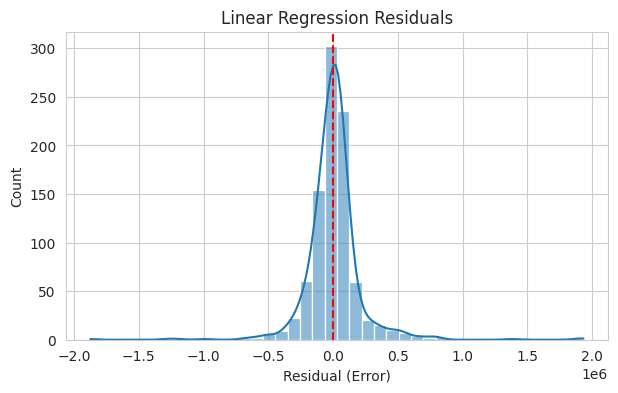

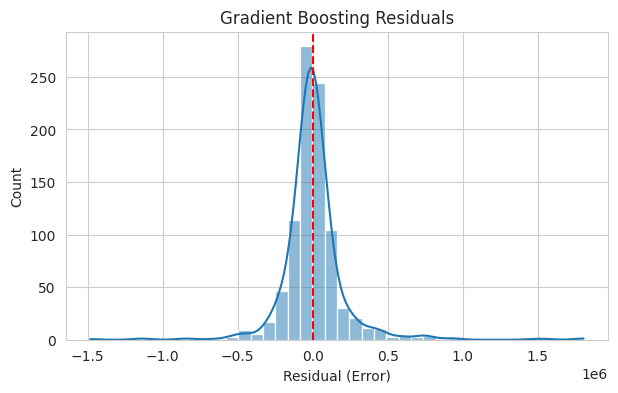

In [ ]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(7,4))
    sns.histplot(residuals, bins=40, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel("Residual (Error)")
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression Residuals")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting Residuals")

**METRICS COMPARISON PLOT**

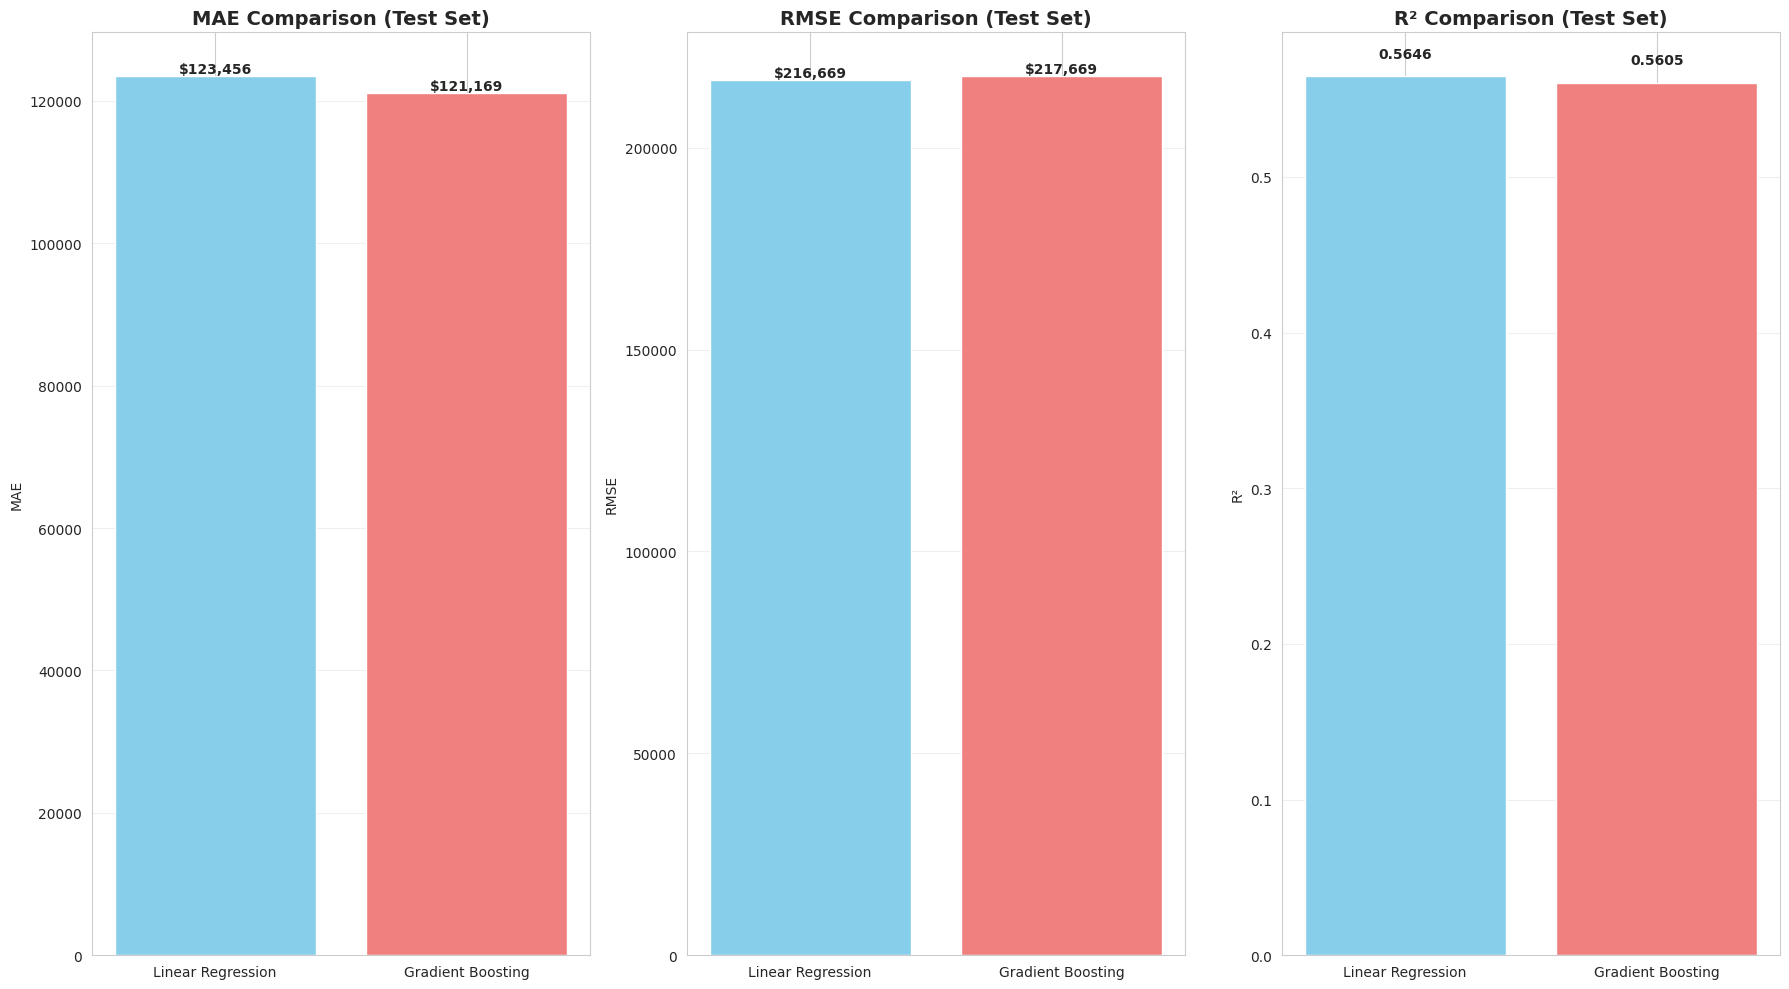

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

metrics = ['MAE', 'RMSE', 'R²']
lr_test_metrics = [lr_test_mae, lr_test_rmse, lr_test_r2]
gb_test_metrics = [gb_test_mae, gb_test_rmse, gb_test_r2]

for idx, (metric, lr_val, gb_val) in enumerate(zip(metrics, lr_test_metrics, gb_test_metrics)):
    axes[idx].bar(['Linear Regression', 'Gradient Boosting'],
                  [lr_val, gb_val],
                  color=['skyblue', 'lightcoral'])
    axes[idx].set_title(f'{metric} Comparison (Test Set)', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate([lr_val, gb_val]):
        if metric == 'R²':
            axes[idx].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')
        else:
            axes[idx].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

**FEATURE IMPORTANCE**

In [ ]:
preprocessor.fit(X_train)
feature_names_out = preprocessor.get_feature_names_out()

# Linear Regression Feature Importance
lr_feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': lr_model.named_steps['regressor'].coef_
})
lr_feature_importance['Absolute Importance'] = np.abs(lr_feature_importance['Importance'])
lr_feature_importance = lr_feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Gradient Boosting Feature Importance
gb_feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': gbr_model.named_steps['regressor'].feature_importances_
})
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

# Assign to global variables for other cells to use
feature_importance_lr = lr_feature_importance
feature_importance_gb = gb_feature_importance

print("Feature importances calculated for both models.")

Feature importances calculated for both models.


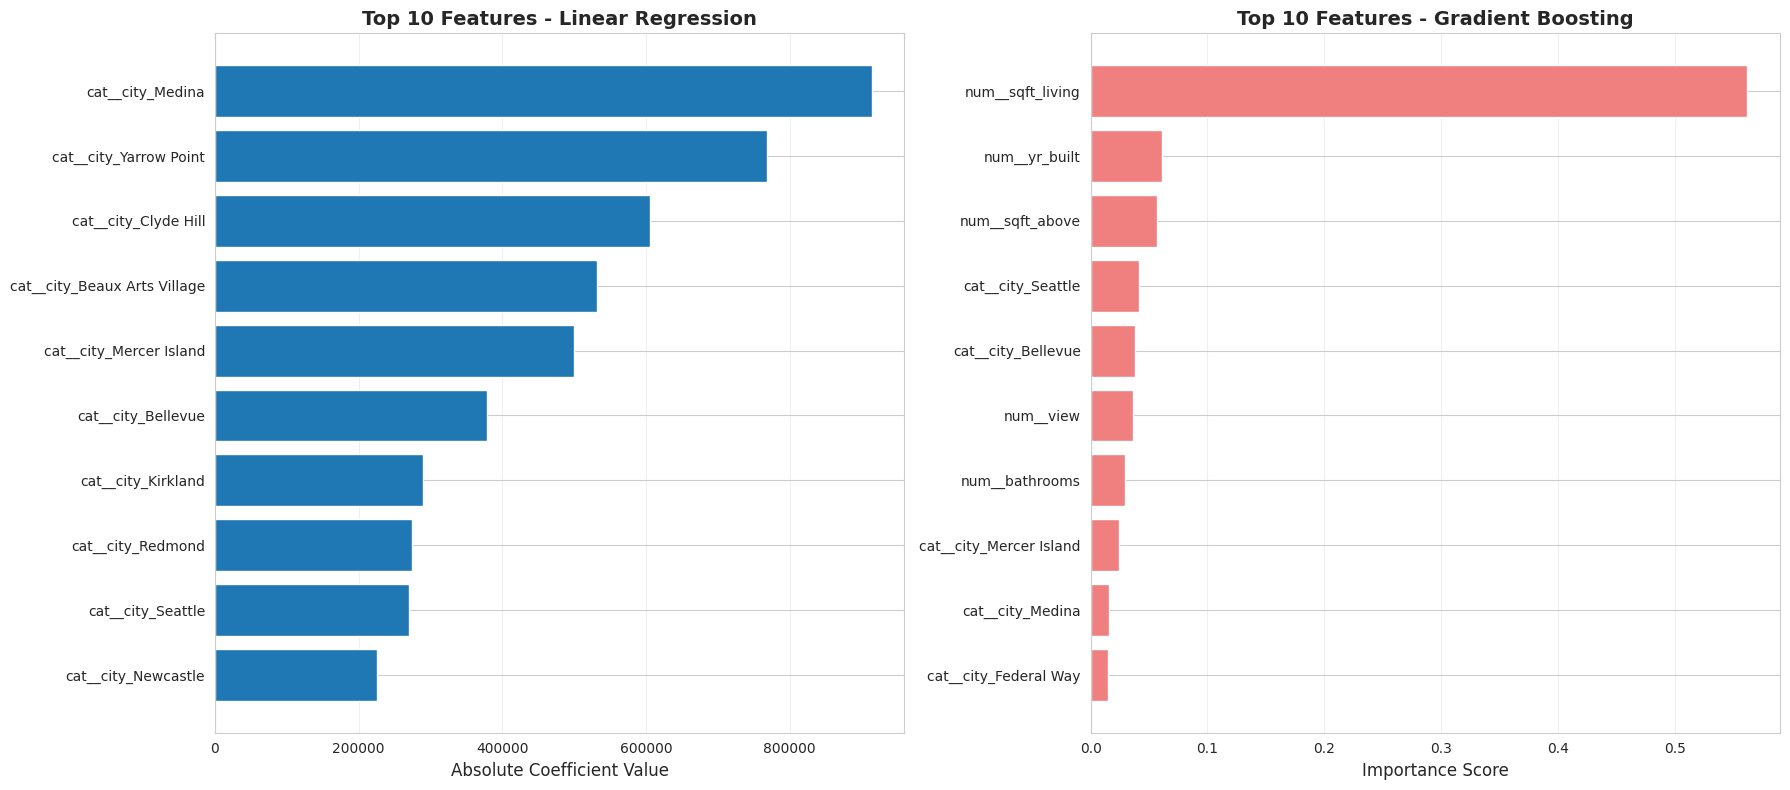

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Linear Regression Feature Importance
top_features_lr = feature_importance_lr.head(10)
axes[0].barh(range(len(top_features_lr)), top_features_lr['Absolute Importance'])
axes[0].set_yticks(range(len(top_features_lr)))
axes[0].set_yticklabels(top_features_lr['Feature'])
axes[0].set_xlabel('Absolute Coefficient Value', fontsize=12)
axes[0].set_title('Top 10 Features - Linear Regression', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Gradient Boosting Feature Importance
top_features_gb = feature_importance_gb.head(10)
axes[1].barh(range(len(top_features_gb)), top_features_gb['Importance'], color='lightcoral')
axes[1].set_yticks(range(len(top_features_gb)))
axes[1].set_yticklabels(top_features_gb['Feature'])
axes[1].set_xlabel('Importance Score', fontsize=12)
axes[1].set_title('Top 10 Features - Gradient Boosting', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

**BEST MODEL SELECTION**

In [ ]:
# Determine best model
if gb_test_r2 > lr_test_r2:
    best_model = "Gradient Boosting"
    best_r2 = gb_test_r2
    best_mae = gb_test_mae
    best_rmse = gb_test_rmse
else:
    best_model = "Linear Regression"
    best_r2 = lr_test_r2
    best_mae = lr_test_mae
    best_rmse = lr_test_rmse

print(f"\n1. BEST PERFORMING MODEL: {best_model}")
print(f"   R² Score: {best_r2:.4f} (explains {best_r2*100:.2f}% of variance)")
print(f"   MAE: ${best_mae:,.2f}")
print(f"   RMSE: ${best_rmse:,.2f}")

print("\n2. MODEL PERFORMANCE ANALYSIS:")
if gb_test_r2 > lr_test_r2:
    print("Gradient Boosting outperforms Linear Regression")
    print("GB captures non-linear relationships better")
    print("GB handles feature interactions more effectively")
else:
    print("Linear Regression performs comparably to Gradient Boosting")
    print("Data relationships are relatively linear")
    print("Simpler model is sufficient for this dataset")



1. BEST PERFORMING MODEL: Linear Regression
   R² Score: 0.5646 (explains 56.46% of variance)
   MAE: $123,456.30
   RMSE: $216,669.22

2. MODEL PERFORMANCE ANALYSIS:
Linear Regression performs comparably to Gradient Boosting
Data relationships are relatively linear
Simpler model is sufficient for this dataset


In [ ]:
print("\nTOP PRICE PREDICTORS:")
print("Based on feature importance analysis:")
for idx, row in feature_importance_gb.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")


TOP PRICE PREDICTORS:
Based on feature importance analysis:
   - num__sqft_living: 0.5620
   - num__yr_built: 0.0610
   - num__sqft_above: 0.0571
   - cat__city_Seattle: 0.0417
   - cat__city_Bellevue: 0.0379
